In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()
print(dir(iris))
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:150]

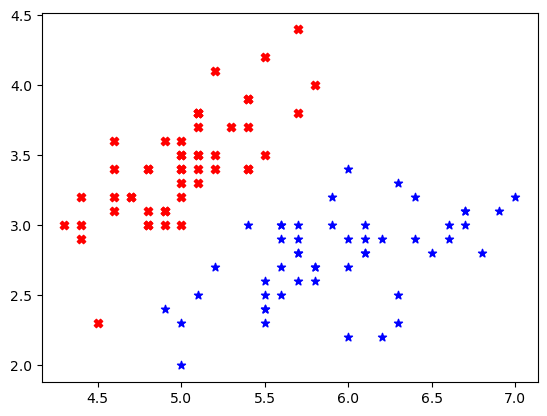

In [18]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='X')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target','flower_name'],axis=1)
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.svm import SVC

SVM_model = SVC(kernel='rbf',C=1,gamma='scale')
SVM_model.fit(X_train,y_train)


SVC(C=1)

In [28]:
y_pred = SVM_model.predict(X_test)
SVM_model.score(X_train,y_train)

0.975

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
SVM_model1 = SVC(C=10)
SVM_model1.fit(X_train,y_train)
SVM_model1.score(X_train,y_train)

0.975

In [31]:
SVM_model2 = SVC(gamma=45)
SVM_model2.fit(X_train,y_train)
SVM_model2.score(X_train,y_train)

1.0